In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('final_test.csv')

In [3]:
df.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


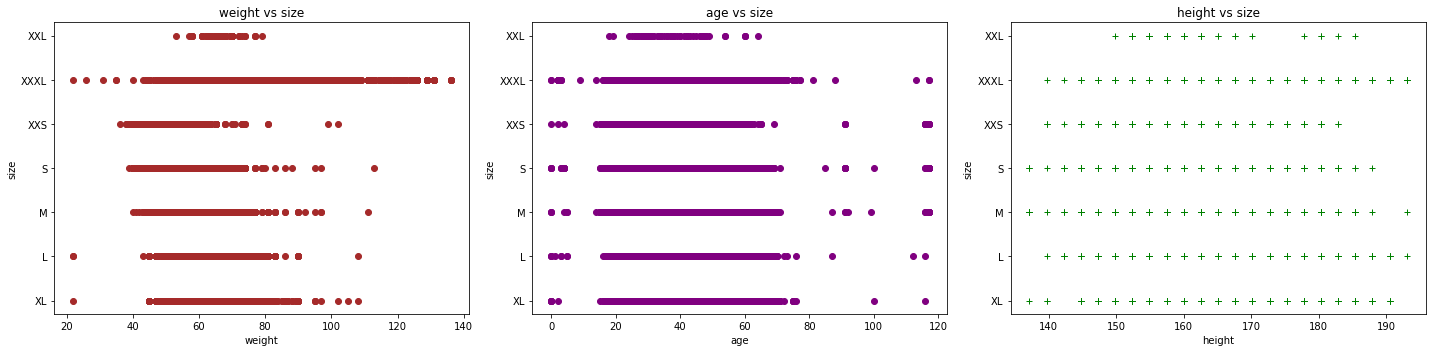

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

axes[0].plot(df['weight'], df['size'], 'bo', color='brown')
axes[0].set_title('weight vs size')
axes[0].set_xlabel('weight')
axes[0].set_ylabel('size')


axes[1].plot(df['age'], df['size'], 'go', color='purple')
axes[1].set_title('age vs size')
axes[1].set_xlabel('age')
axes[1].set_ylabel('size')

axes[2].plot(df['height'], df['size'], 'r+', color='green')
axes[2].set_title('height vs size')
axes[2].set_xlabel('height')
axes[2].set_ylabel('size')

fig.tight_layout()

In [65]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

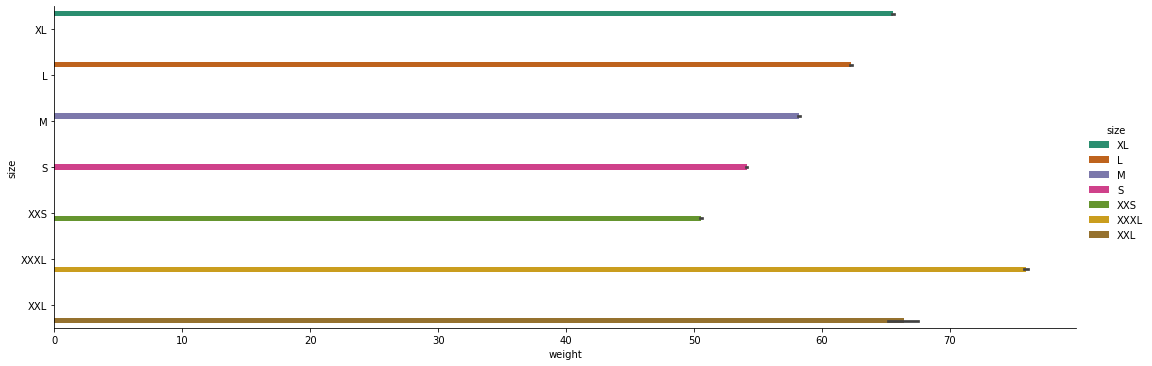

In [224]:
sns.catplot(x='weight', y='size', data=df, hue='size', kind='bar', palette='Dark2', aspect=3)
plt.show()

In [66]:
df.isnull().sum()

weight      0
age       257
height    330
size        0
dtype: int64

In [67]:
df.dropna(inplace=True)

In [68]:
X = df[['weight', 'age', 'height']]

In [69]:
y = df['size']

In [70]:
from sklearn.preprocessing import LabelEncoder

In [71]:
encoder = LabelEncoder()
encoder.fit(y)

LabelEncoder()

In [72]:
target = encoder.transform(y)

In [74]:
target.shape

(119153,)

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=90)

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [389]:
tree_model = DecisionTreeClassifier(random_state=78, max_leaf_nodes=100)

In [390]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=100, random_state=78)

In [391]:
predictions = tree_model.predict(X_test)

In [392]:
predictions

array([6, 1, 2, ..., 1, 1, 3])

In [393]:
question = 59, 36, 167.64

In [394]:
result = tree_model.predict([question])

In [395]:
result

array([1])

In [396]:
encoder.inverse_transform(result)

array(['M'], dtype=object)

In [397]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [398]:
confusion_matrix(y_test, predictions)

array([[1256, 2156,  184, 1333,    0,   14,  326],
       [1005, 5255, 1739,  545,    0,  136,  124],
       [ 126, 2281, 3350,   46,    0,  767,   12],
       [1019, 1066,   85, 2249,    0,    7, 1331],
       [   1,    2,    0,    4,    0,    0,    8],
       [   8,  259, 1488,    6,    0, 1163,    3],
       [ 183,  142,   19, 1016,    0,    3, 5029]], dtype=int64)

In [399]:
accuracy_score(y_test, predictions)

0.5120013428075869

In [400]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.35      0.24      0.28      5269
           1       0.47      0.60      0.53      8804
           2       0.49      0.51      0.50      6582
           3       0.43      0.39      0.41      5757
           4       0.00      0.00      0.00        15
           5       0.56      0.40      0.46      2927
           6       0.74      0.79      0.76      6392

    accuracy                           0.51     35746
   macro avg       0.43      0.42      0.42     35746
weighted avg       0.50      0.51      0.50     35746



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [401]:
q1 = 50, 29, 5.4

In [402]:
r1 = tree_model.predict([q1])

In [403]:
encoder.inverse_transform(r1)

array(['S'], dtype=object)

In [404]:
q2 = 100, 30, 5.8

In [405]:
r2 = encoder.inverse_transform(tree_model.predict([q2]))

In [406]:
r2

array(['XXXL'], dtype=object)